<a href="https://colab.research.google.com/github/AliRG97/CarInsuranceFraud/blob/main/Insurance_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preperation**

**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt


**Importing Data**

In [ ]:
!pip install kaggle
files.upload()  #Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"alirg97","key":"d2cf42736f38734ae26d43465f8f5483"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19            885         38  1.0              
arnavsmayan/netflix-userbase-dataset                              Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41            968         26  1.0              
aaditshukla/flipkart-fasion-products-dataset                       Ecommerce Product dataset                           15MB  2023-07-04 05:44:07            513         24  0.941176

In [ ]:
!kaggle datasets download -d shivamb/vehicle-claim-fraud-detection #Download the dataset
!ls

vehicle-claim-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
 fraud_oracle.csv   kaggle.json   vehicle-claim-fraud-detection.zip
'kaggle (1).json'   sample_data


In [ ]:
!unzip '/content/vehicle-claim-fraud-detection.zip' -d '/content'
!ls

Archive:  /content/vehicle-claim-fraud-detection.zip
replace /content/fraud_oracle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  fraud_oracle.csv   kaggle.json   vehicle-claim-fraud-detection.zip
'kaggle (1).json'   sample_data


In [ ]:
data = pd.read_csv('fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# **Preprocessing**

**Exploring the data**

In [ ]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
data.isna().sum()
# no cell is missing a value

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
print (data.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [ ]:
for column in data.columns :
  print(column)
  print(data[column].value_counts())
  print('\n-------------\n')

Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64

-------------

WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64

-------------

DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64

-------------

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

-------------

AccidentArea
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

-------------

DayOfWeekClaimed
Monday       3757
T

In [ ]:
#droping irrelevant columns
irr = ['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek']
data.drop(columns = irr)

,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


**Visualization**

In [ ]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11,7)})
def plot_percentage(data,col) :
  fgroup = data[[col,'FraudFound_P']].groupby(col).sum()
  n = data[col].value_counts()
  fgroup = fgroup.reindex(n.index)
  fgroup.reset_index(inplace = True)
  fgroup['Fraude_Percentage'] = np.divide(np.array(fgroup['FraudFound_P']) * 100.0,np.array(n))
  g = sns.barplot(data=fgroup,x='index',y='Fraude_Percentage')
  g.set(xlabel=col)

<Axes: xlabel='Year', ylabel='Count'>

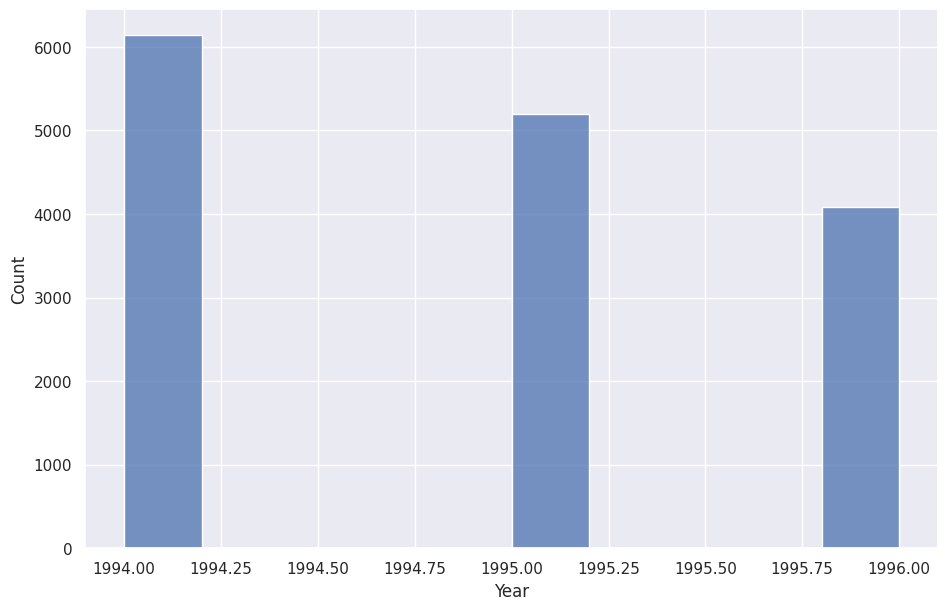

In [ ]:
sns.histplot(data['Year'],kde_kws={'label':'Year'},bins = 10)

<Axes: xlabel='Age', ylabel='Count'>

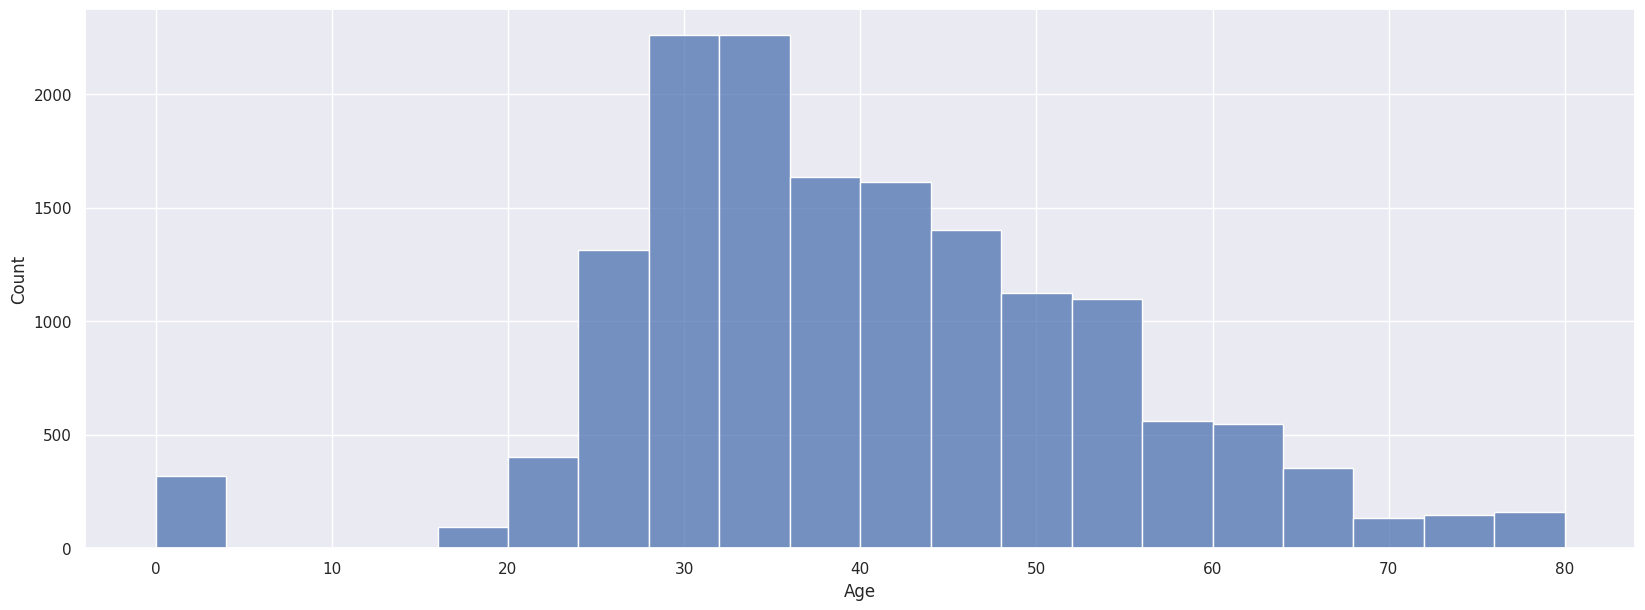

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
sns.histplot(data['Age'],kde_kws={'label':'Age'},bins = 20)


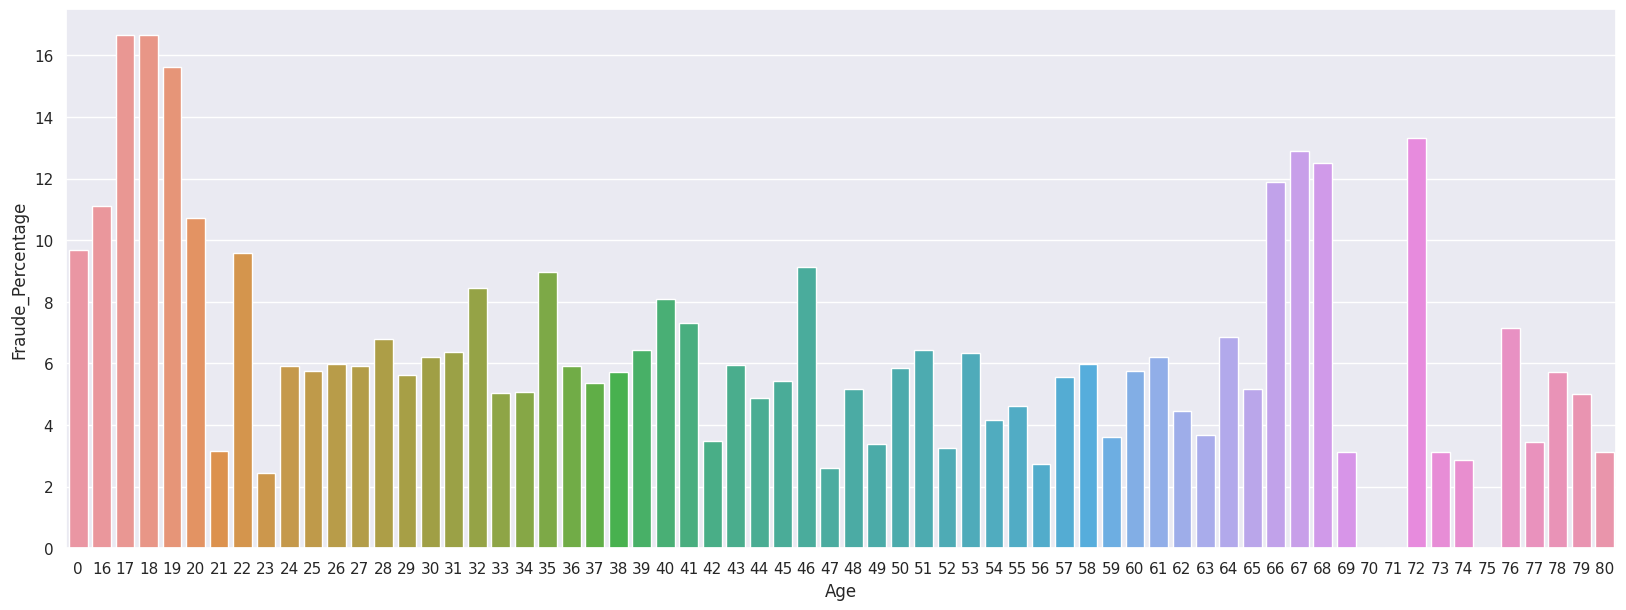

In [ ]:
plot_percentage(data,'Age')

<Axes: xlabel='Sex', ylabel='Count'>

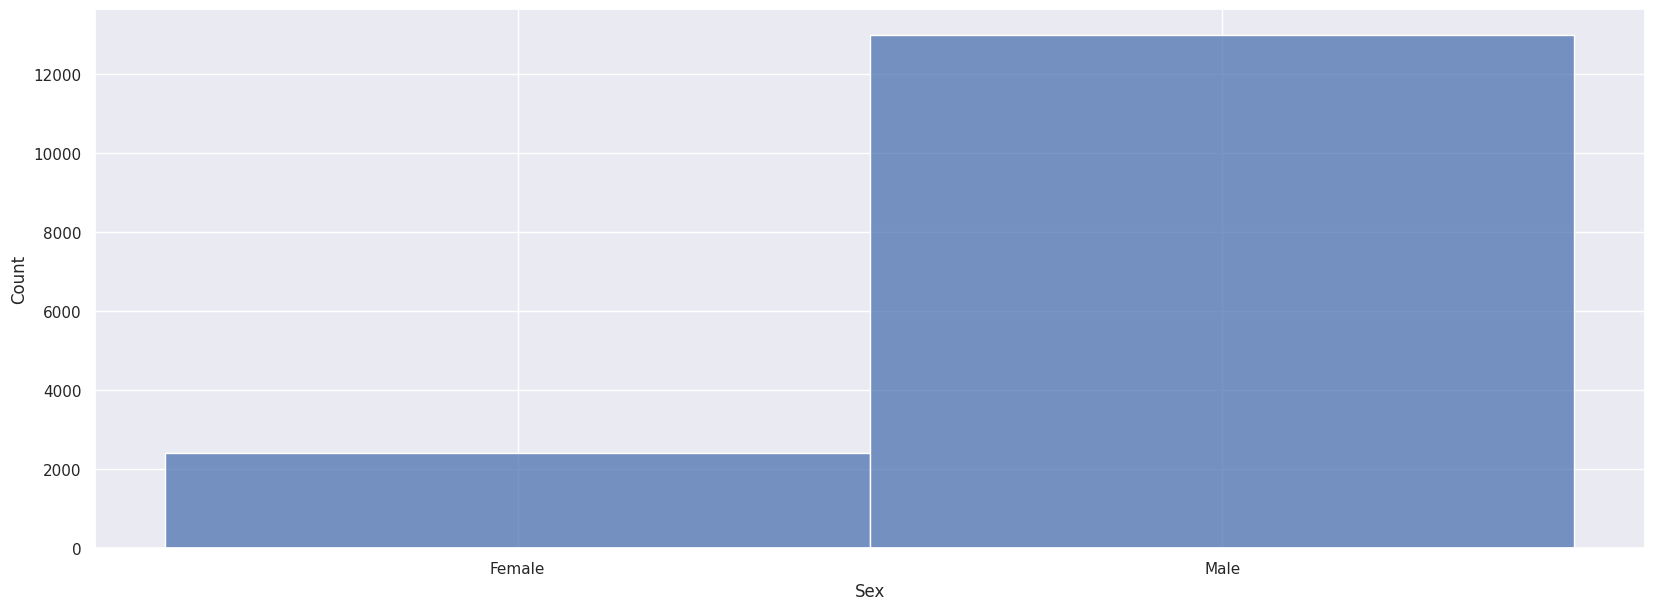

In [ ]:
sns.histplot(data['Sex'],kde_kws={'label':'Sex'},bins = 2)

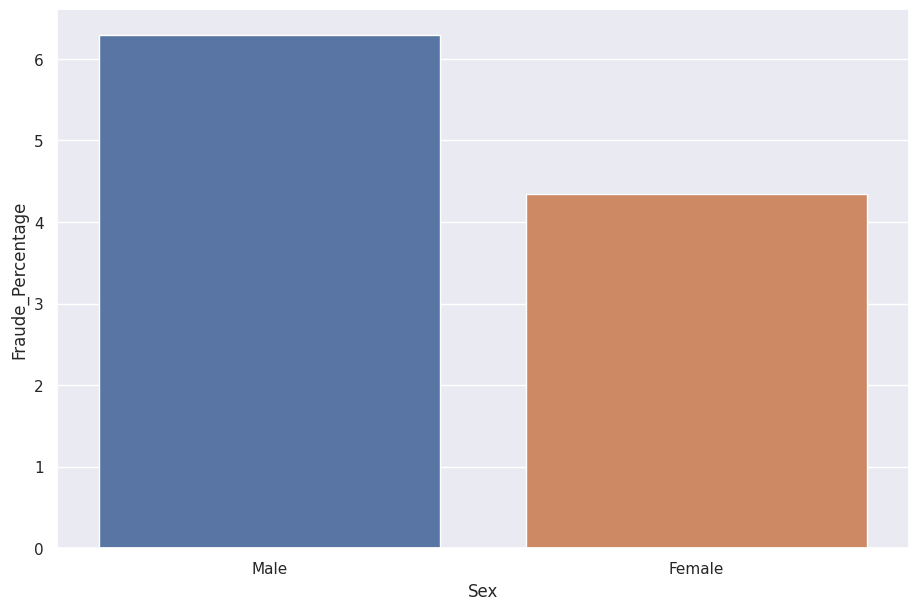

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})

plot_percentage(data,'Sex')

<Axes: xlabel='Make', ylabel='Count'>

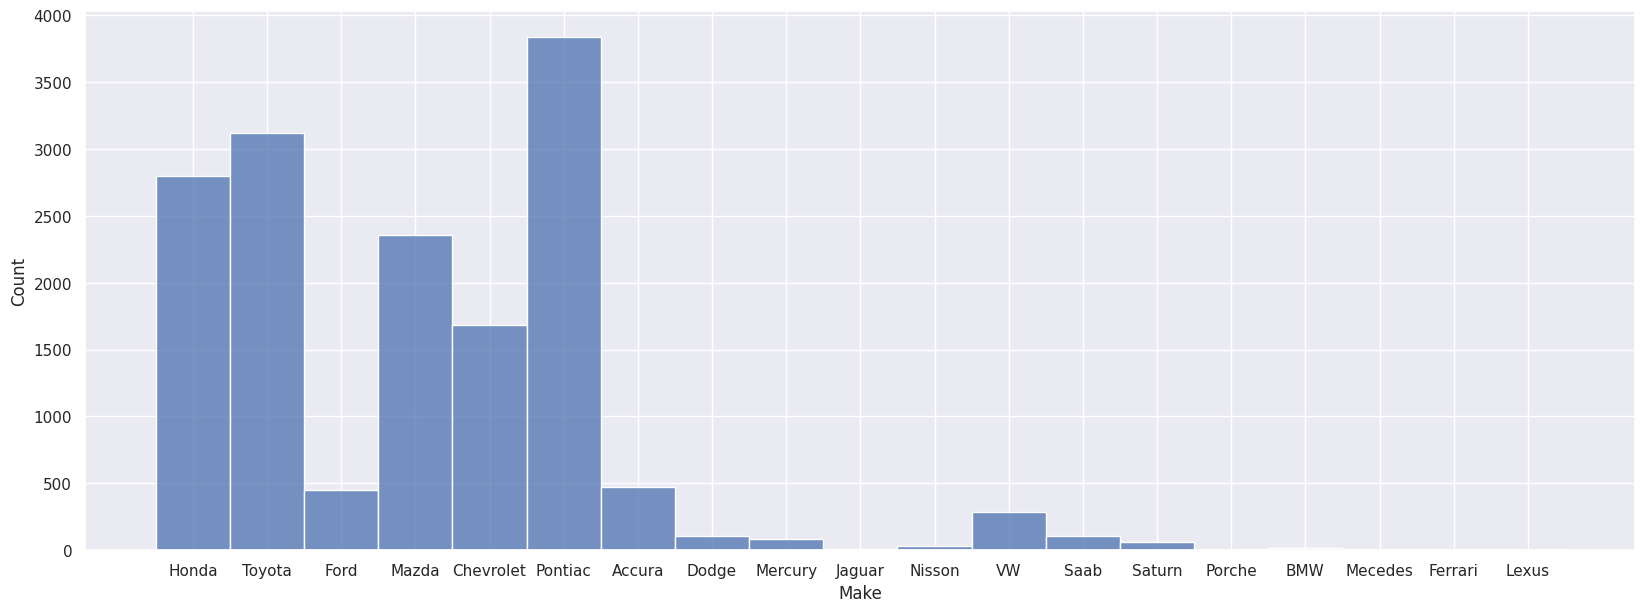

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
sns.histplot(data['Make'],kde_kws={'label':'Make'},bins = 20)

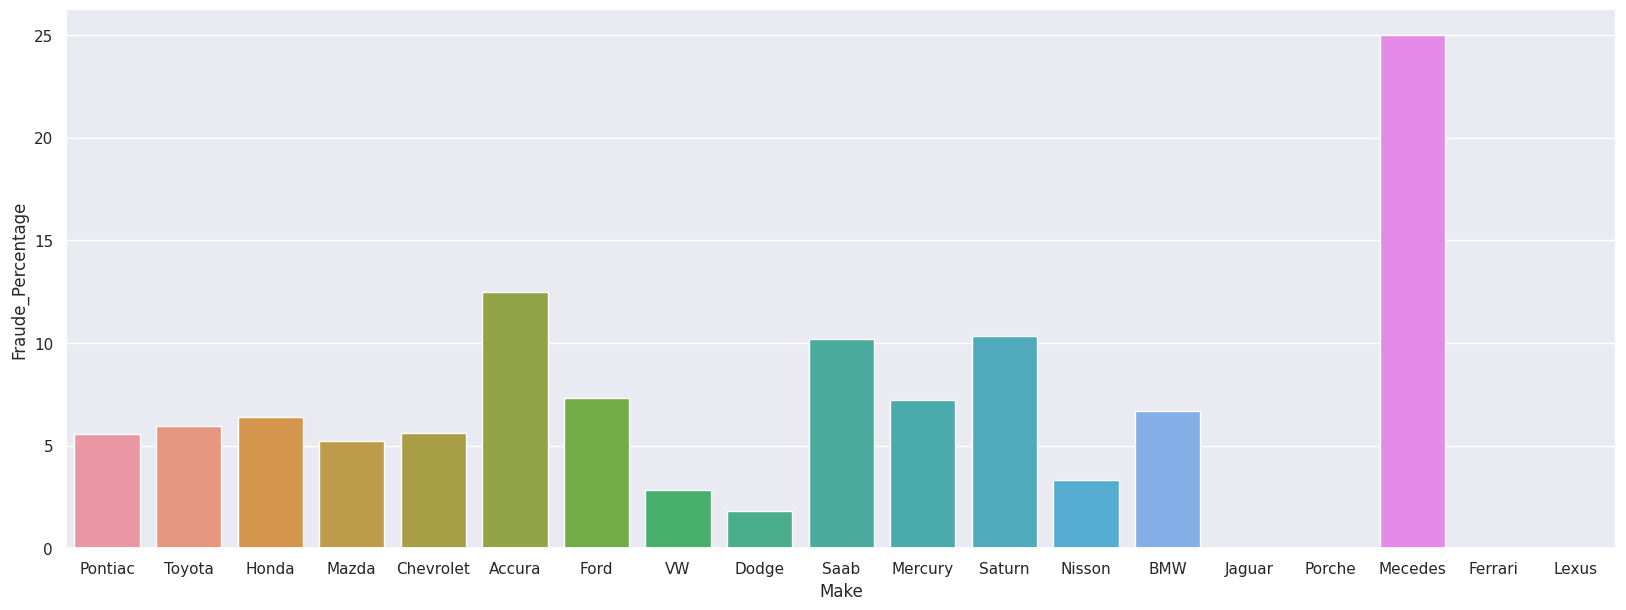

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
plot_percentage(data,'Make')

<Axes: xlabel='MaritalStatus', ylabel='Count'>

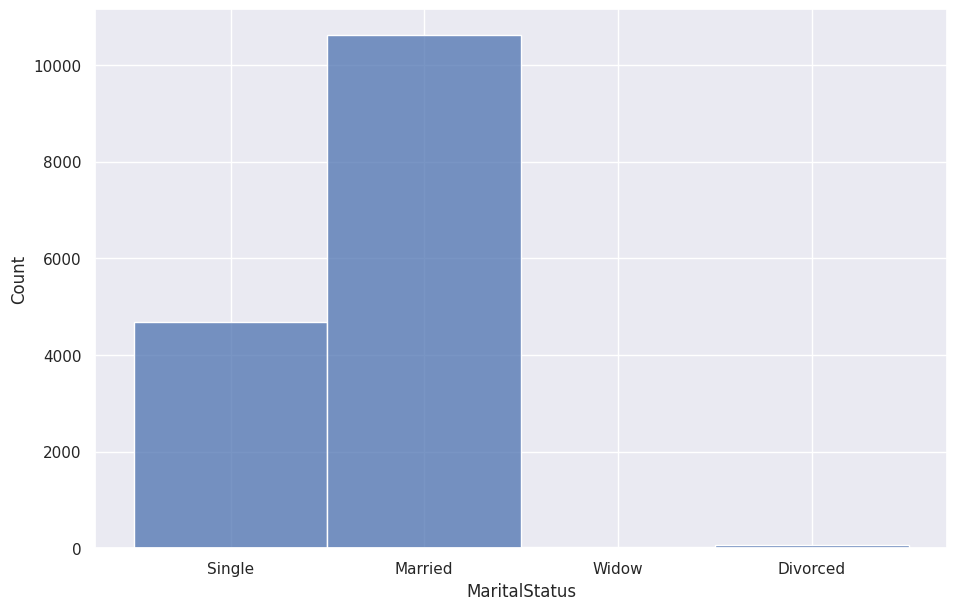

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
sns.histplot(data['MaritalStatus'],kde_kws={'label':'MaritalStatus'},bins = 4)

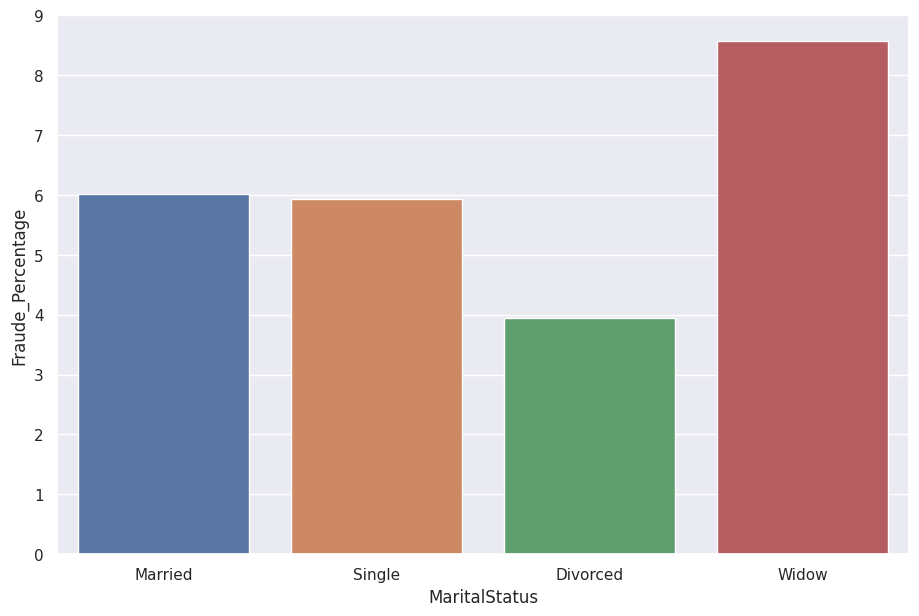

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
plot_percentage(data,'MaritalStatus')

<Axes: xlabel='AgeOfVehicle', ylabel='Count'>

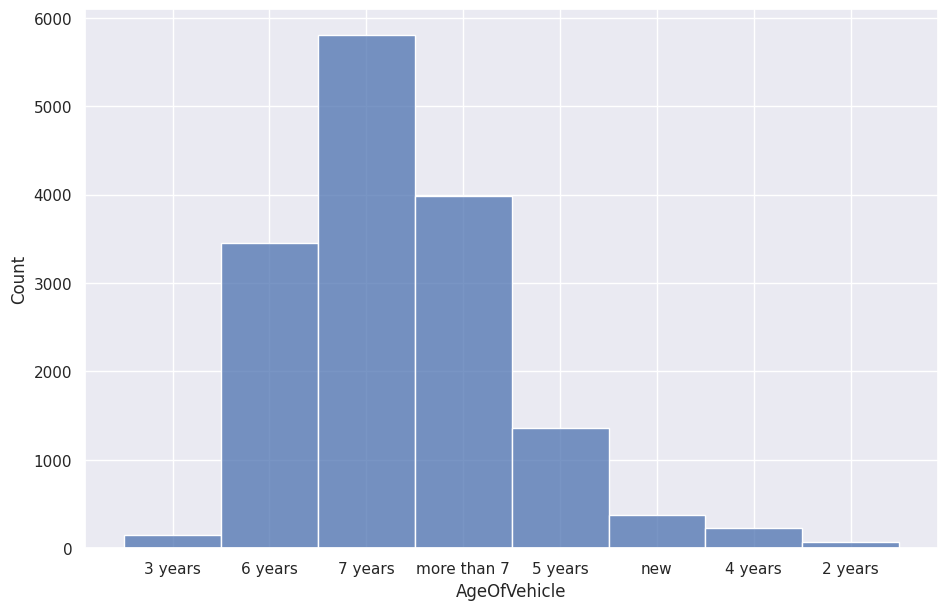

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
sns.histplot(data['AgeOfVehicle'],kde_kws={'label':'AgeOfVehicle'},bins = 10)

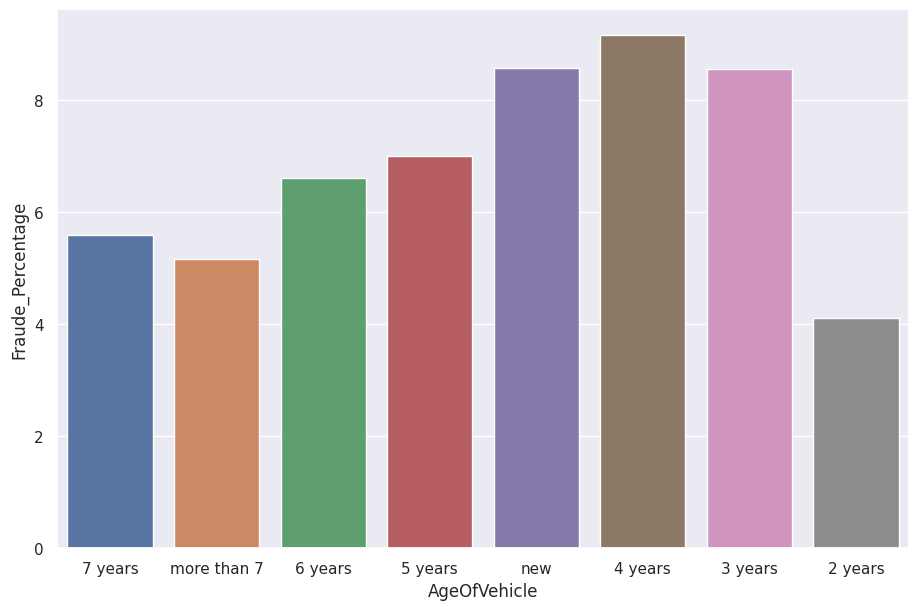

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
plot_percentage(data,'AgeOfVehicle')

<Axes: xlabel='VehiclePrice', ylabel='Count'>

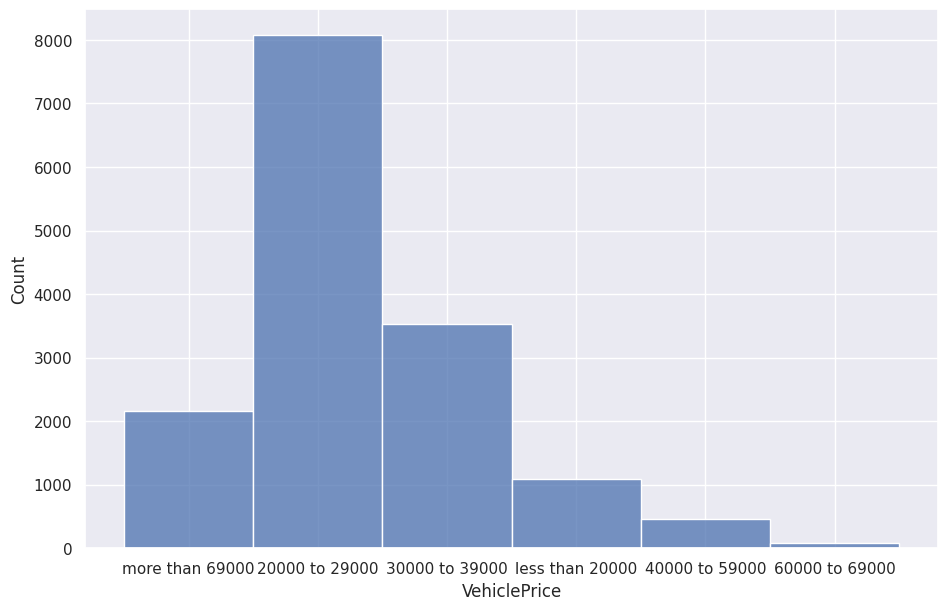

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
sns.histplot(data['VehiclePrice'],kde_kws={'label':'VehiclePrice'},bins = 10)

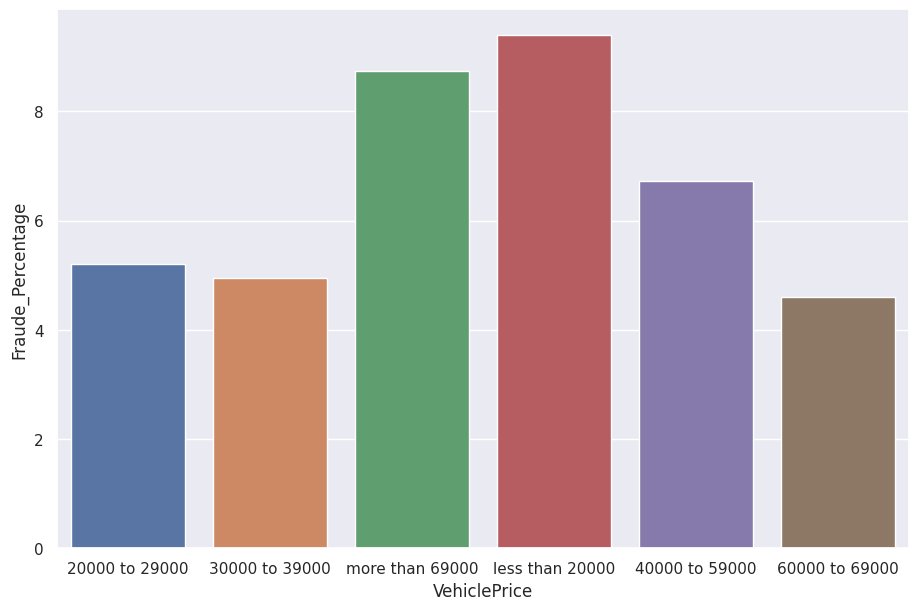

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
plot_percentage(data,'VehiclePrice')

<Axes: xlabel='AccidentArea', ylabel='Count'>

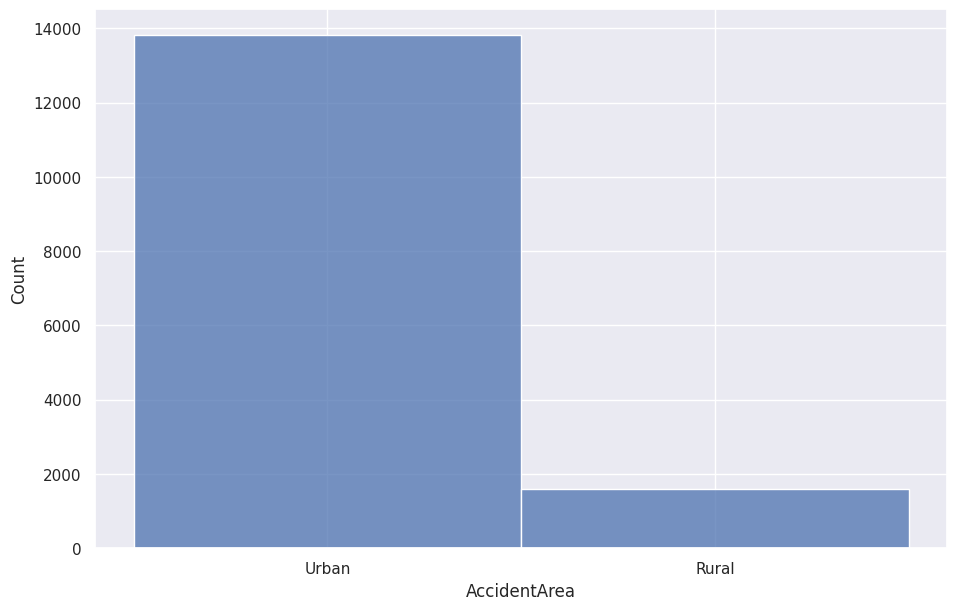

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
sns.histplot(data['AccidentArea'],kde_kws={'label':'AccidentArea'},bins = 10)

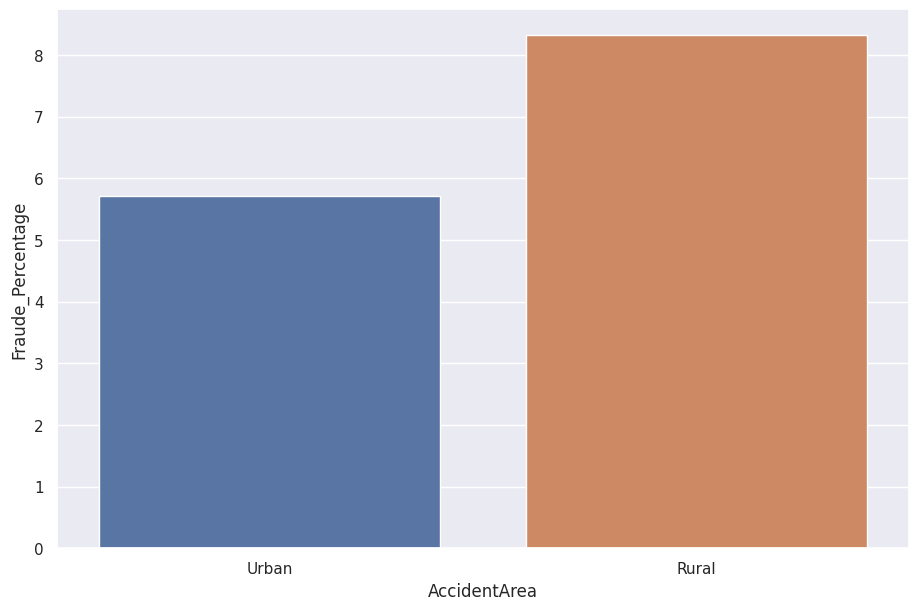

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
plot_percentage(data,'AccidentArea')

<Axes: xlabel='WitnessPresent', ylabel='Count'>

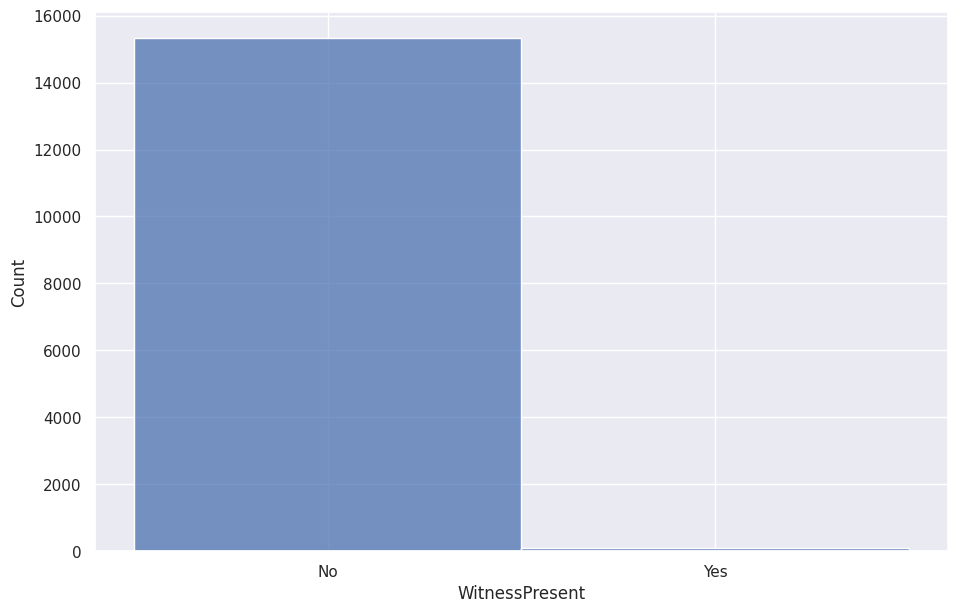

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
sns.histplot(data['WitnessPresent'],kde_kws={'label':'WitnessPresent'},bins = 10)

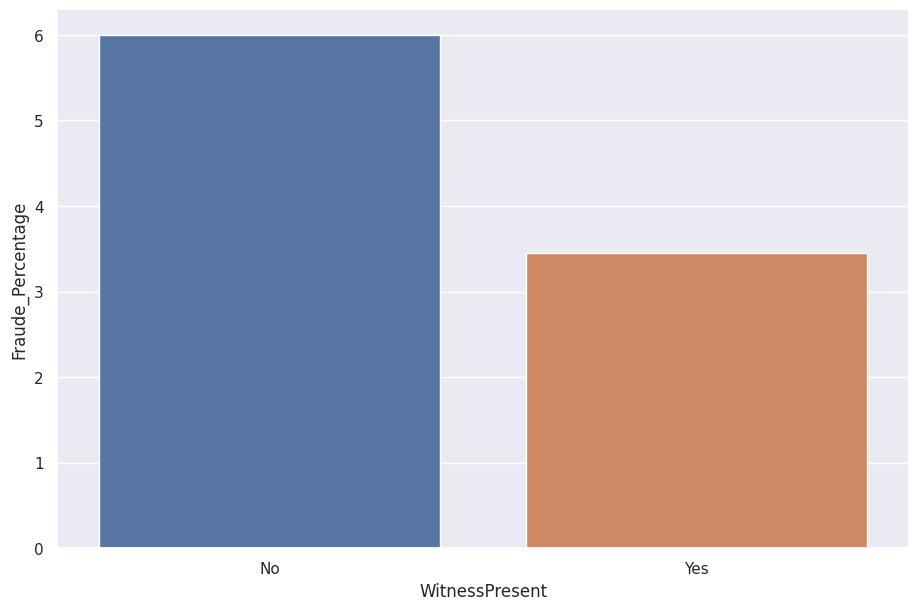

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})
plot_percentage(data,'WitnessPresent')

<ipython-input-285-c46e4d9634b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

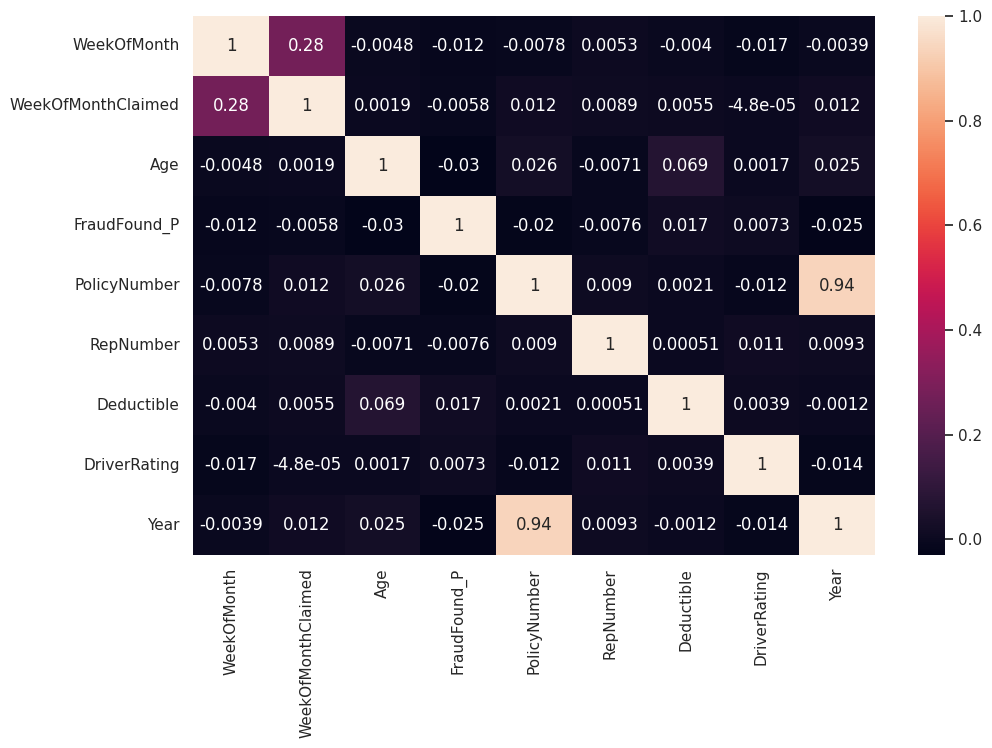

In [ ]:
sns.heatmap(data.corr(),annot = True)

# **Models**

**preperation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score,roc_curve
from sklearn.preprocessing import MinMaxScaler
import joblib
import calendar

def roc_plot (model,x_test,y_test) :
  y_pred_prob = model.predict_proba(x_test)[:,1]
  fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
  sns.set(rc={'figure.figsize':(5,3)})
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr,tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()

**Revising variables & generating dummy variables**

In [ ]:
intervals = [0, 20, 35, 50, 65, 200]
labels = ['0to20', '20to35', '35to50', '50to65', '+65']
data['age_group'] = pd.cut(data['Age'], bins=intervals, labels=labels)
data['age_group'] = data['age_group'].astype(str)

cat_columns = data.select_dtypes(include=['object']).columns
cat_data = pd.get_dummies(data[cat_columns])
Features = cat_data
Labels = data['FraudFound_P']

sc = MinMaxScaler()
sc.fit(Features)
Features_scaled = pd.DataFrame(sc.transform(Features))
Features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Test-Train split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Features_scaled, Labels, test_size=0.3, random_state=42)

**Logistic Regression**

Accuracy Score :   0.9386078685689581
Confusion Matrix :
[[4340    1]
 [ 283    2]]
Precision Score :
   [0.93878434 0.66666667]
Recall Score :
   [0.99976964 0.00701754]
F1 Score :
   [0.96831772 0.01388889]
ROC-AUC Score :
   0.5033935910959154


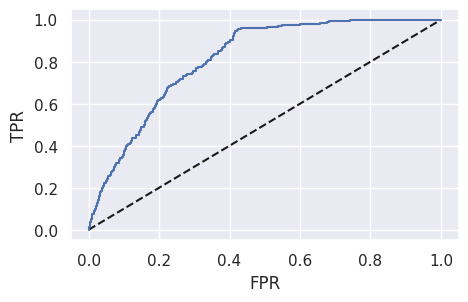

In [ ]:
from sklearn.linear_model import LogisticRegression
# Regular Logistic Regression
lg = LogisticRegression(random_state = 13, class_weight=None,max_iter=500).fit(x_train,y_train)
y_pred = lg.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(lg,x_test,y_test)

**SVM**

Accuracy Score :   0.9383916990920882
Confusion Matrix :
[[4341    0]
 [ 285    0]]
Precision Score :
   [0.9383917 0.       ]
Recall Score :
   [1. 0.]
F1 Score :
   [0.96821679 0.        ]
ROC-AUC Score :
   0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


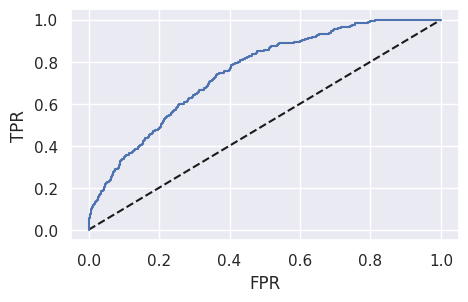

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score

#Regular SVM model
s = svm.SVC(probability= True)
s.fit(x_train,y_train)

y_pred = s.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(s,x_test,y_test)


**Decision-Trees**

Accuracy Score :   0.8908344141807177
Confusion Matrix :
[[4063  278]
 [ 227   58]]
Precision Score :
   [0.94708625 0.17261905]
Recall Score :
   [0.93595946 0.20350877]
F1 Score :
   [0.94148998 0.18679549]
ROC-AUC Score :
   0.5697341141381442


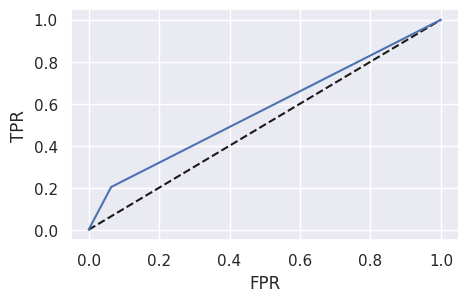

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier().fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(dt,x_test,y_test)

**KNN**

Accuracy Score :   0.9362300043233895
Confusion Matrix :
[[4323   18]
 [ 277    8]]
Precision Score :
   [0.93978261 0.30769231]
Recall Score :
   [0.99585349 0.02807018]
F1 Score :
   [0.96700593 0.05144695]
ROC-AUC Score :
   0.511961832708932


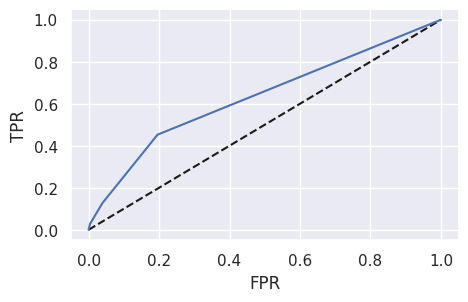

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Regular KNN
knn = KNeighborsClassifier().fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(knn,x_test,y_test)

**Random Forest**

Accuracy Score :   0.9383916990920882
Confusion Matrix :
[[4341    0]
 [ 285    0]]
Precision Score :
   [0.9383917 0.       ]
Recall Score :
   [1. 0.]
F1 Score :
   [0.96821679 0.        ]
ROC-AUC Score :
   0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


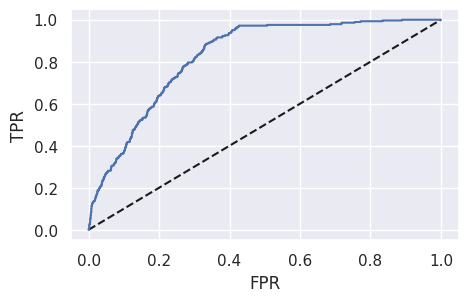

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5,random_state=13).fit(x_train,y_train)
y_pred = rf.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(rf,x_test,y_test)

# **Weighted Models**

**Logistic Regression (Weighted)**

In [ ]:
#w = {0:data['FraudFound_P'].value_counts()[1] , 1:data['FraudFound_P'].value_counts()[0]}
w = {0:1, 1:49.8}

Accuracy Score :   0.5985732814526589
Confusion Matrix :
[[2497 1844]
 [  13  272]]
Precision Score :
   [0.99482072 0.12854442]
Recall Score :
   [0.57521308 0.95438596]
F1 Score :
   [0.72894468 0.22657226]
ROC-AUC Score :
   0.7647995247275063


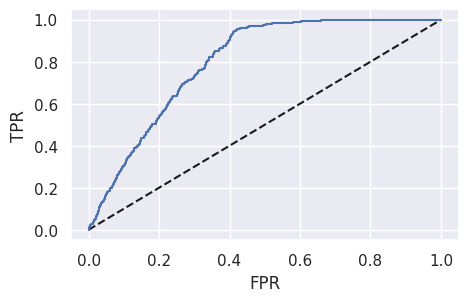

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score
# Weighed Logistic Regression
lg = LogisticRegression(random_state = 13, class_weight=w,max_iter=600).fit(x_train,y_train)
y_pred = lg.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(lg,x_test,y_test)

**SVM (Weighted)**

Accuracy Score :   0.8130134025075659
Confusion Matrix :
[[3629  712]
 [ 153  132]]
Precision Score :
   [0.95954521 0.1563981 ]
Recall Score :
   [0.83598249 0.46315789]
F1 Score :
   [0.89351225 0.23383525]
ROC-AUC Score :
   0.649570193625044


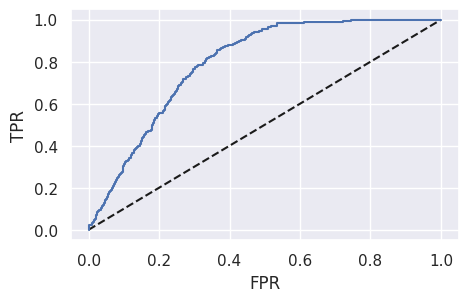

In [ ]:
from sklearn.utils import class_weight
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score

#Weighted SVM model
s = svm.SVC(probability=True,class_weight=w).fit(x_train,y_train)

y_pred = s.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}')
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(s,x_test,y_test)

**Decision-Trees (Weighted)**

Accuracy Score :   0.8964548205793342
Confusion Matrix :
[[4098  243]
 [ 236   49]]
Precision Score :
   [0.94554684 0.16780822]
Recall Score :
   [0.94402211 0.17192982]
F1 Score :
   [0.94478386 0.16984402]
ROC-AUC Score :
   0.557975969640757


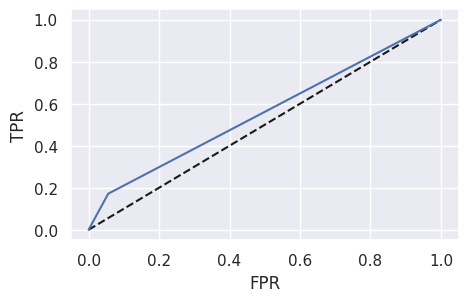

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(class_weight=w).fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(dt,x_test,y_test)

# **Models With Under-Sampling**

**Sample Generation**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import collections
sampler = RandomUnderSampler()
balanced_x,balanced_y = sampler.fit_resample(Features,Labels)
balanced_x = pd.DataFrame(balanced_x)
balanced_y = pd.DataFrame(balanced_y)
print(balanced_y.value_counts())
sc = MinMaxScaler()
sc.fit(balanced_x)
balanced_x = pd.DataFrame(sc.transform(balanced_x))
print(balanced_x.head())
x_train,x_test,y_train,y_test = train_test_split(balanced_x, balanced_y, test_size=0.3, random_state=42)

FraudFound_P
0               923
1               923
dtype: int64
   0    1    2    3    4    5    6    7    8    9    ...  136  137  138  139  \
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

   140  141  142  143  144  145  
0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 146 columns]


**Decision-Trees (Under-sampled)**

Accuracy Score :   0.6931407942238267
Confusion Matrix :
[[192  83]
 [ 87 192]]
Precision Score :
   [0.68817204 0.69818182]
Recall Score :
   [0.69818182 0.68817204]
F1 Score :
   [0.69314079 0.69314079]
ROC-AUC Score :
   0.6931769305962855


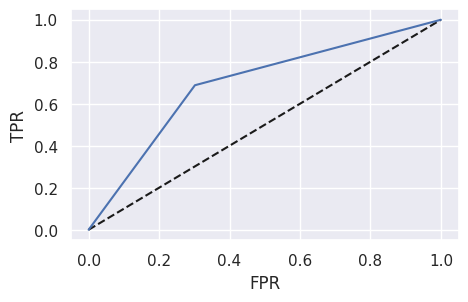

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier().fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(dt,x_test,y_test)

**Random Forest (Under-sampled)**

<ipython-input-307-3abe9f4cc715>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(max_depth = 5,random_state=13).fit(x_train,y_train)


Accuracy Score :   0.7815884476534296
Confusion Matrix :
[[168 107]
 [ 14 265]]
Precision Score :
   [0.92307692 0.71236559]
Recall Score :
   [0.61090909 0.94982079]
F1 Score :
   [0.73522976 0.8141321 ]
ROC-AUC Score :
   0.7803649397197783


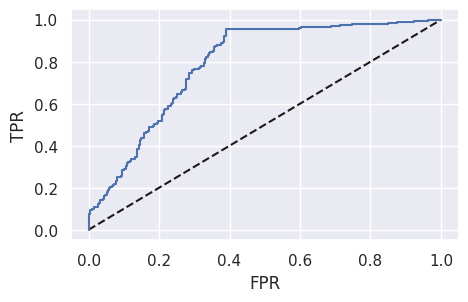

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Under-sampled RandomForest
rf = RandomForestClassifier(max_depth = 5,random_state=13).fit(x_train,y_train)
y_pred = rf.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(rf,x_test,y_test)

**KNN (Under-sampled)**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score :   0.7021660649819494
Confusion Matrix :
[[183  92]
 [ 73 206]]
Precision Score :
   [0.71484375 0.69127517]
Recall Score :
   [0.66545455 0.73835125]
F1 Score :
   [0.68926554 0.71403813]
ROC-AUC Score :
   0.7019028999674162


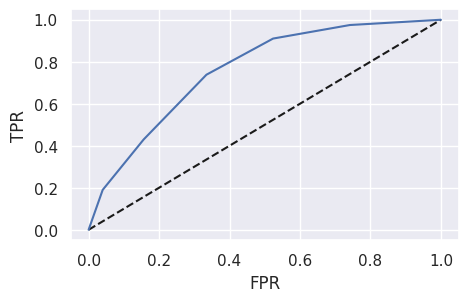

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Under-sampled KNN
knn = KNeighborsClassifier().fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(f'Accuracy Score :   {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}') # Preformance is highlt imbalanced
print(f'Precision Score :\n   {precision_score(y_test,y_pred,average = None)}')
print(f'Recall Score :\n   {recall_score(y_test,y_pred,average= None)}')
print(f'F1 Score :\n   {f1_score(y_test,y_pred,average= None)}')
print(f'ROC-AUC Score :\n   {roc_auc_score(y_test,y_pred)}')

roc_plot(knn,x_test,y_test)